In [2]:
import pandas as pd
import numpy as np
import os
import io
#from google.colab import files

In [3]:
uplooad = files.upload()


Saving data_titanic.csv to data_titanic.csv


In [5]:
data = pd.read_csv(io.BytesIO(uplooad['data_titanic.csv']), sep=',')
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Cabin,Q,S
0,0,0,3,0,22.0,2,0,1
1,1,1,1,1,38.0,2,0,0
2,2,1,3,1,26.0,1,0,1
3,3,1,1,1,35.0,2,0,1
4,4,0,3,0,35.0,2,0,1


In [3]:
data = pd.read_csv('data_titanic.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Q', 'S'], dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Cabin,Q,S
0,0,3,0,22.0,2,0,1
1,1,1,1,38.0,2,0,0
2,1,3,1,26.0,1,0,1
3,1,1,1,35.0,2,0,1
4,0,3,0,35.0,2,0,1


In [6]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Q', 'S']
data[col]
data.head()

,Survived,Pclass,Sex,Age,Cabin,Q,S
0,0,3,0,22.0,2,0,1
1,1,1,1,38.0,2,0,0
2,1,3,1,26.0,1,0,1
3,1,1,1,35.0,2,0,1
4,0,3,0,35.0,2,0,1


In [7]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [8]:
X.head()

,Pclass,Sex,Age,Cabin,Q,S
0,3,0,22.0,2,0,1
1,1,1,38.0,2,0,0
2,3,1,26.0,1,0,1
3,1,1,35.0,2,0,1
4,3,0,35.0,2,0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 6)
(268, 6)
(623,)
(268,)


In [6]:
pip install lazypredict

In [7]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [20]:
lc = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lc.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 19.10it/s]

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [22]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.93               0.92     0.92      0.93   
LabelPropagation                   0.91               0.91     0.91      0.91   
XGBClassifier                      0.91               0.91     0.91      0.91   
RandomForestClassifier             0.91               0.91     0.91      0.91   
DecisionTreeClassifier             0.91               0.90     0.90      0.91   
BaggingClassifier                  0.91               0.90     0.90      0.91   
LGBMClassifier                     0.91               0.90     0.90      0.91   
SVC                                0.91               0.90     0.90      0.91   
ExtraTreeClassifier                0.91               0.90     0.90      0.91   
LabelSpreading                     0.90               0.90     0.90      0.90   
BernoulliNB                 

In [24]:
print(predictions)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.93               0.92     0.92      0.93   
LabelPropagation                   0.91               0.91     0.91      0.91   
XGBClassifier                      0.91               0.91     0.91      0.91   
RandomForestClassifier             0.91               0.91     0.91      0.91   
DecisionTreeClassifier             0.91               0.90     0.90      0.91   
BaggingClassifier                  0.91               0.90     0.90      0.91   
LGBMClassifier                     0.91               0.90     0.90      0.91   
SVC                                0.91               0.90     0.90      0.91   
ExtraTreeClassifier                0.91               0.90     0.90      0.91   
LabelSpreading                     0.90               0.90     0.90      0.90   
BernoulliNB                 

In [11]:
from sklearn.ensemble import AdaBoostClassifier
lc = AdaBoostClassifier()
modele = lc.fit(X_train, y_train)

/home/seraphin/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [12]:
modele

AdaBoostClassifier()

In [13]:
print(modele.score(X_train, y_train))
print(modele.score(X_test, y_test))


0.9550561797752809
0.9253731343283582


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, roc_curve, roc_auc_score
y_pred = modele.predict(X_test)
accuracy_score(y_test, y_pred)

0.9253731343283582

In [15]:
confusion_matrix(y_test, y_pred)

array([[149,   8],
       [ 12,  99]])

/home/seraphin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


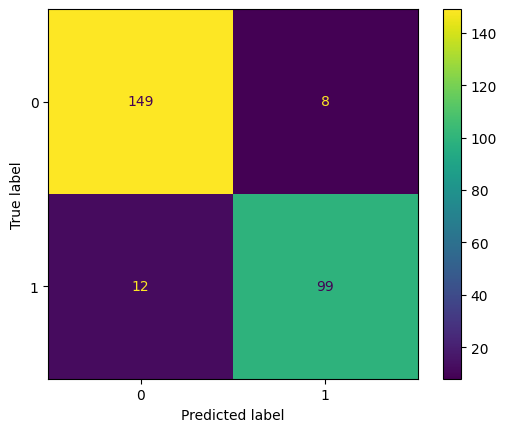

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [17]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94       157\n           1       0.93      0.89      0.91       111\n\n    accuracy                           0.93       268\n   macro avg       0.93      0.92      0.92       268\nweighted avg       0.93      0.93      0.93       268\n'

In [18]:
roc_curve(y_test, y_pred)

(array([0.        , 0.05095541, 1.        ]),
 array([0.        , 0.89189189, 1.        ]),
 array([inf,  1.,  0.]))

In [19]:
roc_auc_score(y_test, y_pred)

0.9204682389395765

In [20]:
f1_score(y_test, y_pred)

0.908256880733945

In [21]:
modele.n_estimators

50

In [22]:
X.head()

,Pclass,Sex,Age,Cabin,Q,S
0,3,0,22.0,2,0,1
1,1,1,38.0,2,0,0
2,3,1,26.0,1,0,1
3,1,1,35.0,2,0,1
4,3,0,35.0,2,0,1


In [23]:
personne = {
    'Pclass': 1,
    'Sex': '1',
    'Age': 38,
    'Cabin': 2,
    'Q': 0,
    'S': 0
}
data = pd.DataFrame(personne, index=[0])
data

,Pclass,Sex,Age,Cabin,Q,S
0,1,1,38,2,0,0


In [24]:
predictions = modele.predict(data)
print(predictions)

[1]


In [25]:
personne = {
    'Pclass': 3,
    'Sex': '0',
    'Age': 22,
    'Cabin': 2,
    'Q': 0,
    'S': 0
}
data = pd.DataFrame(personne, index=[0])
data

,Pclass,Sex,Age,Cabin,Q,S
0,3,0,22,2,0,0


In [26]:
predictions = modele.predict(data)
print(predictions)

[0]


In [29]:
import joblib
joblib.dump(modele, 'model_predict1.pkl')

['model_predict1.pkl']

In [30]:
modele_titanic = joblib.load('model_predict1.pkl')
modele_titanic

AdaBoostClassifier()

In [31]:
modele_titanic.predict(data)

array([0])